In [2]:
# pip install seaborn

In [66]:
# 데이터 분석을 위해 pandas, numpy 시각화를 위해 matplotlib 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyhive import hive
import re
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
# 그래프 스타일 결정
plt.style.use("ggplot")

In [51]:
# 하이브 연결
cursor = hive.connect('localhost').cursor()

In [52]:
# 190101 ~ 191231 동안의 삼성전자 종가, 거래량 조회
sql ="""
    SELECT stk_cd ,dt ,o_prc ,c_prc ,l_prc ,h_prc ,vol 
    FROM history_dt hd 
    WHERE hd.stk_cd ='005930'
    AND hd.dt BETWEEN '2019-01-01' AND '2019-12-31'
"""

In [54]:
cursor.execute(sql)

In [55]:
result = cursor.fetchall()

In [10]:
# result

In [56]:
df = pd.DataFrame(result)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       246 non-null    object
 1   1       246 non-null    object
 2   2       246 non-null    object
 3   3       246 non-null    object
 4   4       246 non-null    object
 5   5       246 non-null    object
 6   6       246 non-null    object
dtypes: object(7)
memory usage: 13.6+ KB


In [57]:
desc = cursor.description
# desc

In [58]:
col_name = list(zip(*desc))[0]
col_name

('stk_cd', 'dt', 'o_prc', 'c_prc', 'l_prc', 'h_prc', 'vol')

In [59]:
# 리스트컴프리헨션을 통해 각 컬럼명 대문자로 변환
col_name =[x.upper() for x in col_name]
col_name

['STK_CD', 'DT', 'O_PRC', 'C_PRC', 'L_PRC', 'H_PRC', 'VOL']

In [60]:
df.columns = col_name
# df

In [61]:
df["DT"] = pd.to_datetime(df["DT"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   STK_CD  246 non-null    object        
 1   DT      246 non-null    datetime64[ns]
 2   O_PRC   246 non-null    object        
 3   C_PRC   246 non-null    object        
 4   L_PRC   246 non-null    object        
 5   H_PRC   246 non-null    object        
 6   VOL     246 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 13.6+ KB


In [71]:
df.loc[:, "C_PRC":] = df.loc[:, "C_PRC":].astype("int64")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   STK_CD  246 non-null    object        
 1   DT      246 non-null    datetime64[ns]
 2   O_PRC   246 non-null    object        
 3   C_PRC   246 non-null    object        
 4   L_PRC   246 non-null    object        
 5   H_PRC   246 non-null    object        
 6   VOL     246 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 13.6+ KB


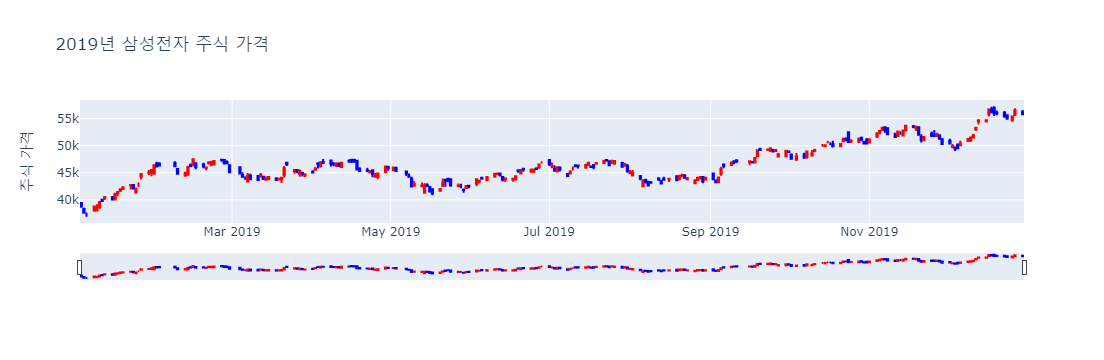

In [77]:
## 봉차트 그리기
candlestick = go.Candlestick(
                            x=df["DT"], # x축 날짜
                            open = df["O_PRC"], # 시가
                            high = df["H_PRC"], # 고가
                            low = df["L_PRC"], # 저가
                            close = df["C_PRC"], # 종가
                            increasing_line_color = 'red', # 양봉 색 설정
                            decreasing_line_color = 'blue' # 음봉 색 설정
                            )

fig = go.Figure(data=[candlestick]) # 봉차트를 fig에 저장

fig.update_layout(
    title = "2019년 삼성전자 주식 가격", 
    yaxis_title = "주식 가격" # y축 제목 설정
)

fig.show()

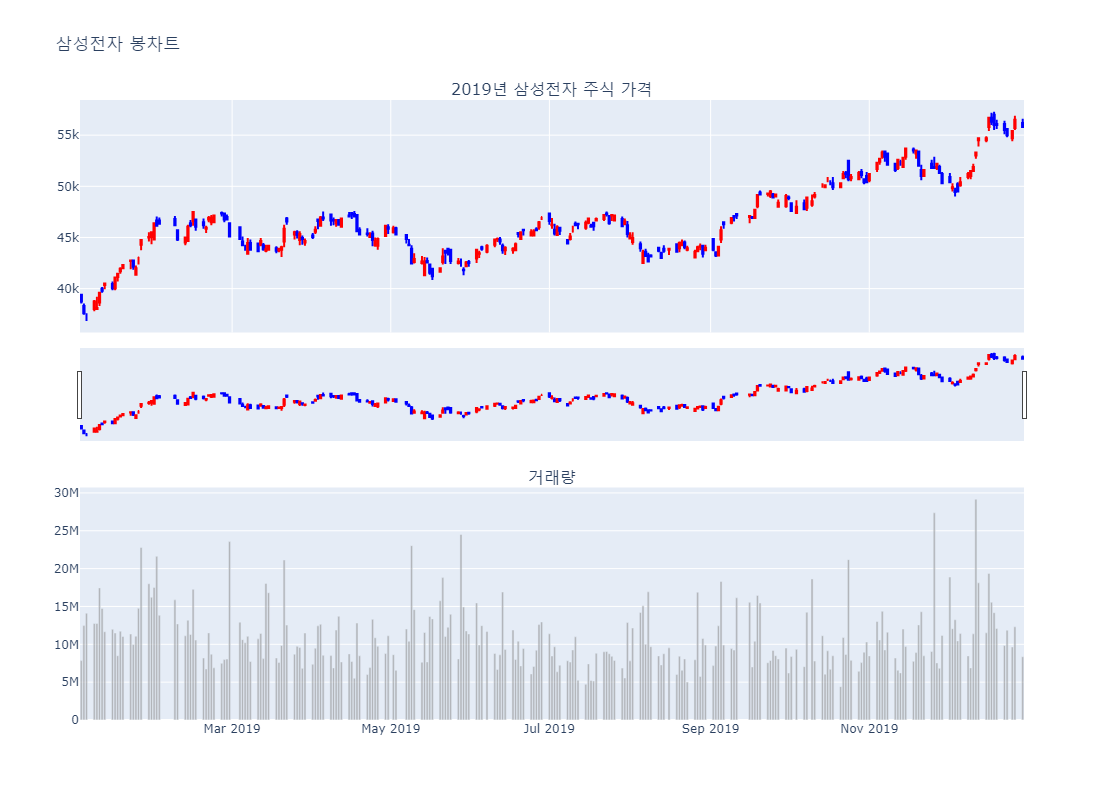

In [81]:
## 봉차트 그리기
candlestick = go.Candlestick(
                            x=df["DT"], # x축 날짜
                            open = df["O_PRC"], # 시가
                            high = df["H_PRC"], # 고가
                            low = df["L_PRC"], # 저가
                            close = df["C_PRC"], # 종가
                            increasing_line_color = 'red', # 양봉 색 설정
                            decreasing_line_color = 'blue', # 음봉 색 설정
                            showlegend=False # 범례를 표기하지 않음
                            )

volume_bars = go.Bar(
                    x=df["DT"], # x축 날짜
                    y=df["VOL"], # y축 거래량
                    showlegend=False, # 범례를 표기하지 않음
                    marker = {
                        "color" : "rgba(128,128,128,0.5)", # 거래량 막대 차트 색 => 회색
                        }
                    )

# 2줄 2칸으로 나눠서 그래프 그림
fig = make_subplots(rows=2
                    ,cols=1
                    ,shared_xaxes=True
                    ,subplot_titles = ("2019년 삼성전자 주식 가격", "거래량")
                   )

# 1번째 줄 1번째 칸에 봉차트 출력
fig.add_trace(candlestick, row=1, col=1)

# 2번째 줄 1번째 칸에 막대 차트 출력
fig.add_trace(volume_bars, row=2, col=1)


fig.update_layout(height = 800 # 봉차트 높이
                  ,width = 1200 # 너비
                  ,title_text = "삼성전자 봉차트"
)

fig.show()